# E-commerce text dataset using Mutual information

## Preprocessing 

### Importing libraries

In [1]:
# File system manangement
import os

# Data manipulation
import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
from nltk.stem import WordNetLemmatizer

### Data

In [2]:
data = pd.read_csv('C:/Users/manal/OneDrive/Desktop/MBDIO/S2/Text_Mining/Projet/E-commerce_Dataset.csv', 
                    names = ['Category', 'Description'])
data

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [3]:
# Example of Description column
data['Description'].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [4]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values        1
Number of duplicate observations              22622


In [5]:
# Dropping observations with missing values
data.dropna(inplace = True)

# Dropping duplicate observations
data.drop_duplicates(inplace = True)

# Resetting index
data.reset_index(drop = True, inplace = True) 

In [6]:
data

,Category,Description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
27797,Electronics,Micromax Bharat 5 Plus Zero impact on visual d...
27798,Electronics,Microsoft Lumia 550 8GB 4G Black Microsoft lum...
27799,Electronics,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ..."
27800,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...


In [7]:
# Manual encoding of labels
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'Category': label_dict}, inplace = True)
data = data[['Description', 'Category']]

data

,Description,Category
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


### Exploratory data analysis [EDA]

In [8]:
# Splitting the dataset by category in order to see how different textual attributes vary across classes
data_E = data[data['Category'] == 0] # Electronics
data_H = data[data['Category'] == 1] # Household
data_B = data[data['Category'] == 2] # Books
data_CA = data[data['Category'] == 3] # Clothing & Accessories

In [9]:
data_E

,Description,Category
22494,Dell 19.5V-3.34AMP 65W Laptop Adapter (Without...,0
22495,Bluetooth Dongle USB CSR 4.0 Adapter Receiver ...,0
22496,"Wi-Fi Receiver 300Mbps, 2.4GHz, 802.11b/g/n US...",0
22497,SanDisk 64GB Class 10 microSDXC Memory Card wi...,0
22498,Gizga Essentials Laptop Power Cable Cord- 3 Pi...,0
...,...,...
27797,Micromax Bharat 5 Plus Zero impact on visual d...,0
27798,Microsoft Lumia 550 8GB 4G Black Microsoft lum...,0
27799,"Microsoft Lumia 535 (Black, 8GB) Colour:Black ...",0
27800,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0


In [10]:
data_H

,Description,Category
0,Paper Plane Design Framed Wall Hanging Motivat...,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",1
4,Incredible Gifts India Wooden Happy Birthday U...,1
...,...,...
10559,Docoss -(Large Size Xl) Hidden Secret Book Saf...,1
10560,"Ozoy Outdoor Solar Lights 42 LED, Ultra High B...",1
10561,JY 8990 Industrial Security Purpose Metal Torc...,1
10562,"RAISSER® Warm White, China : 2PCS Solar LED Pa...",1


In [11]:
data_B

,Description,Category
10564,Inner Engineering: A Yogi's Guide to Joy About...,2
10565,Muslims and Missionaries in Pre-Mutiny India,2
10566,The PCOD - Thyroid Book - Compiled From Women ...,2
10567,The Monk Who Sold His Ferrari Review Everyone ...,2
10568,The Secret of Secrets: The Secrets of the Gold...,2
...,...,...
16815,The Architecture of Happiness About the Author...,2
16816,101 Things I Learned® in Urban Design School R...,2
16817,Zaha Hadid (Basic Art Series 2.0) About the Au...,2
16818,Steal Like an Artist: 10 Things Nobody Told Yo...,2


In [12]:
data_CA

,Description,Category
16820,Woopower 36M Pink for 024M Baby Trouser Top Se...,3
16821,Amour Butterfly Design Sunglasses For Girls 6+...,3
16822,Vaenait Baby 024M Baby Girls Rashguard Swimwea...,3
16823,Kuchipoo Girl's Cotton Regular Fit T-Shirt - P...,3
16824,Orange and Orchid Baby Girl's A-Line Knee-Long...,3
...,...,...
22489,SDK Fashion Latest 2018 100% Cotton Plain Full...,3
22490,Venisa Women's Rayon Top Burgundy,3
22491,Jenee Ventures Fashionable Cropped Taffeta Pan...,3
22492,Tara Lifestyle Women's Stretchable Viscose Pal...,3


###### Class frequencies

In [13]:
# Visualization of class frequencies
values = np.array([len(data_E), len(data_H), len(data_B), len(data_CA)])
Categories = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = Categories, hole = 0.5, textinfo = 'percent', 
                               title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

###### Number of words

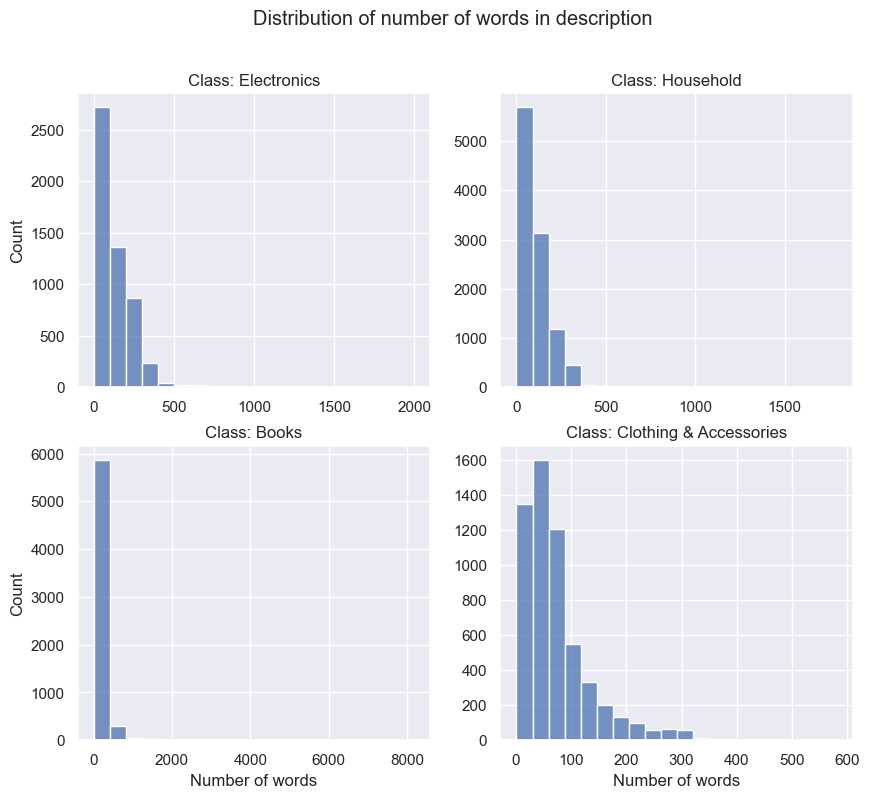

In [14]:
# Distribution of number of words in description
dataE_word = data_E['Description'].str.split().map(lambda x: len(x))
dataH_word = data_H['Description'].str.split().map(lambda x: len(x))
dataB_word = data_B['Description'].str.split().map(lambda x: len(x))
dataCA_word = data_CA['Description'].str.split().map(lambda x: len(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = dataE_word, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = dataH_word, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = dataB_word, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = dataCA_word, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of number of words in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Number of words")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

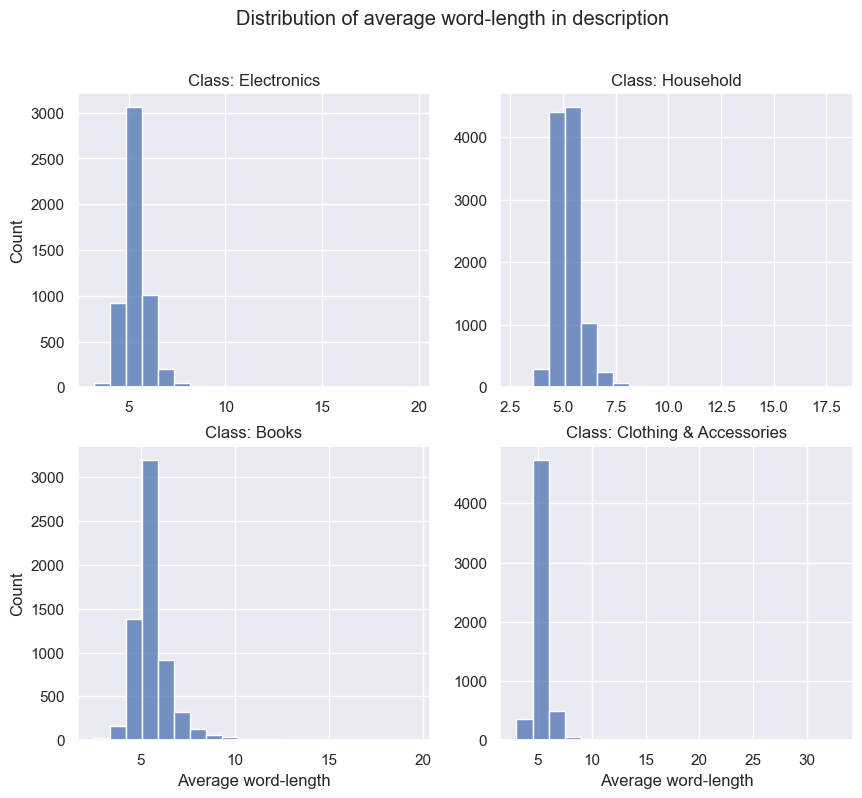

In [15]:
# Distribution of average word-length in description
dataE_avg = data_E['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
dataH_avg = data_H['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
dataB_avg = data_B['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
dataCA_avg = data_CA['Description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

fig, ax = plt.subplots(2, 2, figsize = (10, 8.4), sharey = False)
sns.histplot(x = dataE_avg, bins = 20, ax = ax[0, 0]).set_title('Class: Electronics')
sns.histplot(x = dataH_avg, bins = 20, ax = ax[0, 1]).set_title('Class: Household')
sns.histplot(x = dataB_avg, bins = 20, ax = ax[1, 0]).set_title('Class: Books')
sns.histplot(x = dataCA_avg, bins = 20, ax = ax[1, 1]).set_title('Class: Clothing & Accessories')

fig.suptitle("Distribution of average word-length in description")
for i in range(4):
    ax[i // 2, i % 2].set_xlabel(" ") if i // 2 == 0 else ax[i // 2, i % 2].set_xlabel("Average word-length")
    if i % 2 != 0: ax[i // 2, i % 2].set_ylabel(" ")

### Text normalization

In [16]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

###### Convertion to lowercase

In [17]:
def convert_to_lowercase(text):
    return text.lower()

###### Removal of Whitespaces

In [18]:
def remove_whitespace(text):
    return text.strip()

###### Removal of punctuations

In [19]:
def remove_punctuation(text):
    punct_str = string.punctuation
    # discarding apostrophe from the string to keep the contractions intact
    punct_str = punct_str.replace("'", "") 
    return text.translate(str.maketrans("", "", punct_str))

###### Removal of Unicode Characters

In [20]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [21]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               # emoticons
                           u"\U0001F600-\U0001F64F"
                               # symbols & pictographs
                           u"\U0001F300-\U0001F5FF"  
                               # transport & map symbols
                           u"\U0001F680-\U0001F6FF" 
                               # flags (iOS)
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
# Removing other unicode characters
def remove_http(text):
    # matching strings beginning with http (but not just "http")
    http = "https?://\S+|www\.\S+"
    # creating pattern
    pattern = r"({})".format(http) 
    return re.sub(pattern, "", text)

###### Substitution of Acronyms

In [23]:
# Dictionary of acronyms
acronyms_dict = {"121": "one to one","aka": "also known as","asap": "as soon as possible","a/s/l": "age, sex, location",
"adn": "any day now","afaik": "as far as I know","afk": "away from keyboard","aight": "alright",
"alol": "actually laughing out loud","b4": "before","b4n": "bye for now","bak": "back at the keyboard","bf": "boyfriend",
"bff": "best friends forever","bfn": "bye for now","bg": "big grin","bta": "but then again","brb": "be right back",
"btw": "by the way","cid": "crying in disgrace","cnp": "continued in my next post","cp": "chat post","cu": "see you",
"cul": "see you later","cul8r": "see you later","cya": "bye","cyo": "see you online","dbau": "doing business as usual",
"dob": "date of birth","faq": "frequently asked questions","fyi": "for your information","fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth","g": "grin","g2g": "got to go","ga": "go ahead","gal": "get a life","gf": "girlfriend",
"gfn": "gone for now","gmbo": "giggling my butt off","gmta": "great minds think alike","h8": "hate","hagn": "have a good night",
"hdop": "help delete online predators","hhis": "hanging head in shame","iac": "in any case","ianal": "I am not a lawyer",
"ic": "I see","idk": "i don't know","imao": "in my arrogant opinion","imnsho": "in my not so humble opinion",
"idc": "i don't care","iirc": "if i recall correctly","imo": "in my opinion","irl": "in real life","iow": "in other words",
"ipn": "I’m posting naked","jk": "just kidding","l8r": "later","ld": "later, dude","ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause","lmao": "laugh my ass off","lmirl": "let's meet in real life",
"lol": "laugh out loud","ltr": "longterm relationship","lulab": "love you like a brother","lulas": "love you like a sister",
"luv": "love","lmk": "let me know","lol": "laugh out loud","m/f": "male or female","m8": "mate",
"milf": "mother I would like to fuck","ngl": "not gonna lie","noyb": "none of your business","nvm": "never mind",
"ofc": "of course","oll": "online love","omg": "oh my god","otoh": "on the other hand","pir": "parent in room","ppl": "people",
"pfa": "please find attached","r": "are","rofl": "roll on the floor laughing","rpg": "role playing games","ru": "are you",
"shid": "slaps head in disgust","somy": "sick of me yet","sot": "short of time","thanx": "thanks","thx": "thanks",
"ttyl": "talk to you later","u": "you","ur": "you are","uw": "you’re welcome","stfu": "shut the fuck up",
"tba": "to be announced","tbc": "to be continued","tbd": "to be determined","tbh": "to be honest","ttyl": "talk to you later",
"wtf": "what the fuck","wth": "what the heck","wb": "welcome back","wfm": "works for me","wibni": "wouldn't it be nice if",
"wtf": "what the fuck","wtg": "way to go","wtgp": "want to go private","ym": "young man","gr8": "great"}

In [24]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [25]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

###### Substitution of Contractions

In [26]:
contractions_dict = {"'aight": "alright","ain't": "are not","amn't": "am not","arencha": "are not you","aren't": "are not",
"'bout": "about","can't": "cannot","cap'n": "captain","'cause": "because","'cept": "except","could've": "could have",
"couldn't": "could not","couldn't've": "could not have","dammit": "damn it","daren't": "dare not","daresn't": "dare not",
"dasn't": "dare not","didn't": "did not","doesn't": "does not","doin'": "doing","don't": "do not","dunno": "do not know",
"d'ye": "do you","e'en": "even","e'er": "ever","'em": "them","everybody's": "everybody is","everyone's": "everyone is",
"fo'c'sle": "forecastle","finna": "fixing to","'gainst": "against","g'day": "good day","gimme": "give me","giv'n": "given",
"gonna": "going to","gon't": "go not","gotcha": "got you","gotta": "got to","gtg": "got to go","hadn't": "had not",
"had've": "had have","hasn't": "has not","haven't": "have not","he'd": "he had","he'll": "he shall","helluva": "hell of a",
"he's": "he is","here's": "here is","he've": "he have","how'd": "how would","howdy": "how do you do","how'll": "how will",
"how're": "how are","how's": "how is","i'd": "i would","i'd've": "i would have","i'll": "i shall","i'm": "i am",
"imma": "i am about to","i'm'a": "i am about to","i'm'o": "i am going to","innit": "is it not","ion": "i do not",
"i've": "i have","i'd": "i had","i'd've": "i would have","i'll": "i shall","i'm": "i am","i'm'a": "i am about to",
"i'm'o": "i am going to","innit": "is it not","i've": "i have","isn't": "is not","it'd": "it would","it'll": "it shall",
"it's": "it is","iunno": "i do not know","kinda": "kind of","let's": "let us","li'l": "little","ma'am": "madam",
"mayn't": "may not","may've": "may have","methinks": "me thinks","mightn't": "might not","might've": "might have",
"mustn't": "must not","mustn't've": "must not have","must've": "must have","'neath": "beneath","needn't": "need not",
"nal": "and all","ne'er": "never","o'clock": "of the clock","o'er": "over","ol'": "old","oughtn't": "ought not",
"'round": "around","'s": "is","shalln't": "shall not","shan't": "shall not","she'd": "she had",
"she'll": "she shall","she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have",
"somebody's": "somebody is","someone's": "someone is","something's": "something is","so're": "so are","so's": "so is",
"so've": "so have","that'll": "that shall","that're": "that are","that's": "that is","that'd": "that would",
"there'd": "there had","there'll": "there shall","there're": "there are","there's": "there is","these're": "these are",
"these've": "these have","they'd": "they had","they'll": "they shall","they're": "they are","they've": "they have",
"this's": "this is","those're": "those are","those've": "those have","'thout": "without","'til": "until","'tis": "it is",
"to've": "to have","'twas": "it was","'tween": "between","'twhere": "it were","wanna": "want to","wasn't": "was not",
"we'd": "we had","we'd've": "we would have","we'll": "we shall","we're": "we are","we've": "we have","weren't": "were not",
"whatcha": "what are you","what'd": "what did","what'll": "what shall","what're": "what are","what's": "what is",
"what've": "what have","when's": "when is","where'd": "where did","where'll": "where shall","where're": "where are",
"where's": "where is","where've": "where have","which'd": "which had","which'll": "which shall","which're": "which are",
"which's": "which is","which've": "which have","who'd": "who would","who'd've": "who would have","who'll": "who shall",
"who're": "who are","who's": "who is","who've": "who have","why'd": "why did","why're": "why are","why's": "why is",
"willn't": "will not","won't": "will not","wonnot": "will not","would've": "would have","wouldn't": "would not",
"wouldn't've": "would not have","y'all": "you all","y'all'd've": "you all would have",
"y'all'd'n't've": "you all would not have","y'all're": "you all are","y'all'ren't": "you all are not","y'at": "you at",
"yes'm": "yes madam","yessir": "yes sir","you'd": "you had","you'll": "you shall","you're": "you are","you've": "you have",
"aight": "alright","aint": "are not","amnt": "am not","arent": "are not","cant": "cannot","cause": "because",
"couldve": "could have","couldnt": "could not","couldntve": "could not have","darent": "dare not","daresnt": "dare not",
"dasnt": "dare not","didnt": "did not","doesnt": "does not","doin": "doing","dont": "do not","eer": "ever",
"everybodys": "everybody is","everyones": "everyone is","finna": "fixing to","gday": "good day","givn": "given",
"gont": "go not","hadnt": "had not","hadve": "had have","hasnt": "has not","havent": "have not","hed": "he had",
"hell": "he shall","hes": "he is","heve": "he have","howd": "how did","howdy": "how do you do","howll": "how will",
"howre": "how are","hows": "how is","idve": "i would have","ill": "i shall","im": "i am","ima": "i am about to",
"imo": "i am going to","innit": "is it not","ive": "i have","isnt": "is not","itd": "it would","itll": "it shall",
"its": "it is","lets": "let us","lil": "little","maam": "madam","maynt": "may not","mayve": "may have","methinks": "me thinks",
"mightnt": "might not","mightve": "might have","mustnt": "must not","mustntve": "must not have","mustve": "must have",
"neednt": "need not","neer": "never","oclock": "of the clock","oer": "over","ol": "old","oughtnt": "ought not",
"shallnt": "shall not","shant": "shall not","shed": "she had","shell": "she shall","shes": "she is","shouldve": "should have",
"shouldnt": "should not","shouldntve": "should not have","somebodys": "somebody is","someones": "someone is",
"somethings": "something is","thatll": "that shall","thatre": "that are","thatd": "that would","thered": "there had",
"therell": "there shall","therere": "there are","theres": "there is","thesere": "these are","theseve": "these have",
"theyd": "they had","theyll": "they shall","theyre": "they are","theyve": "they have","thiss": "this is","thosere": "those are",
"thoseve": "those have","tis": "it is","tove": "to have","twas": "it was","wanna": "want to","wasnt": "was not","wed": "we had",
"wedve": "we would have","were": "we are","weve": "we have","werent": "were not","whatd": "what did","whatll": "what shall",
"whatre": "what are","whats": "what is","whatve": "what have","whens": "when is","whered": "where did","wherell": "where shall",
"wherere": "where are","wheres": "where is","whereve": "where have","whichd": "which had","whichll": "which shall",
"whichre": "which are","whichs": "which is","whichve": "which have","whod": "who would","whodve": "who would have",
"wholl": "who shall","whore": "who are","whos": "who is","whove": "who have","whyd": "why did","whyre": "why are",
"whys": "why is","wont": "will not","wouldve": "would have","wouldnt": "would not","wouldntve": "would not have",
"yall": "you all","yalldve": "you all would have","yallre": "you all are","youd": "you had","youll": "you shall",
"youre": "you are","youve": "you have","'re": "are","that's": "that is","thats": "that is"}

In [27]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [28]:
# Function to convert contractions in a text
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

###### Removal of Stop Words

In [29]:
# Stopwords
stop_words = stopwords.words("english") 

# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in stop_words])


###### Lemmatization

In [30]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_wordnet

###### Discardment of Non-alphabetic Words

In [31]:
# Discardment of non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

###### Integration of the Processes

In [32]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    # converting text to one line
    text = re.sub('\n' , '', text)
    # removing square brackets
    text = re.sub('\[.*?\]', '', text) 
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text) 
    text = discard_non_alpha(text)
    return text

In [33]:
# Implementing text normalization
data_normalized = pd.DataFrame()
data_normalized['Normalized_Description'] = data['Description'].apply(text_normalizer)
data_normalized['Category'] = data['Category']
data_normalized

,Normalized_Description,Category
0,paper plane design framed wall hanging motivat...,1
1,saf framed painting wood inch x inch special e...,1
2,saf textured modern art print framed painting ...,1
3,saf flower print framed painting synthetic inc...,1
4,incredible gift india wooden happy birthday un...,1
...,...,...
27797,micromax bharat plus zero impact visual displa...,0
27798,microsoft lumia black microsoft lumia experien...,0
27799,microsoft lumia black colourblack product desc...,0
27800,karbonn titanium wind white karbonn titanium w...,0


In [34]:
# Example of Description column
data_normalized['Normalized_Description'].iloc[0]

'paper plane design framed wall hanging motivational office decor art print x inch set painting made synthetic frame uv textured print give multi effect attracts towards special series painting make wall beautiful give royal touch painting ready hang would proud posse unique painting niche apart use modern efficient printing technology print ink precision epson roland hp printer innovative hd printing technique result durable spectacular looking print highest last lifetime print solely topnotch ink achieve brilliant true colour due high level uv resistance print retain beautiful colour many year add colour style living space digitally printed painting pleasure eternal blissso bring home elegant print lushed rich color make nothing sheer elegance friend familyit would treasured forever whoever lucky recipient liven place intriguing painting high definition hd graphic digital print home office room'

In [35]:
# Saving the dataframe
data_normalized.to_csv('C:/Users/manal/OneDrive/Desktop/MBDIO/S2/Text_Mining/Projet/E-commerce_Dataset_Normalized.csv', 
                       index = False)

## TF-IDF modeling

In [36]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Train-test split, cross validation and feature selections
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [37]:
# Loading the normalized data
data = pd.read_csv('C:/Users/manal/OneDrive/Desktop/MBDIO/S2/Text_Mining/Projet/E-commerce_Dataset_Normalized.csv')
print(data.shape)
data

(27802, 2)


,Normalized_Description,Category
0,paper plane design framed wall hanging motivat...,1
1,saf framed painting wood inch x inch special e...,1
2,saf textured modern art print framed painting ...,1
3,saf flower print framed painting synthetic inc...,1
4,incredible gift india wooden happy birthday un...,1
...,...,...
27797,micromax bharat plus zero impact visual displa...,0
27798,microsoft lumia black microsoft lumia experien...,0
27799,microsoft lumia black colourblack product desc...,0
27800,karbonn titanium wind white karbonn titanium w...,0


In [38]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values      0
Number of duplicate observations              468


In [39]:
# Dropping duplicate observations
data.drop_duplicates(inplace = True) 
# Resetting index
data.reset_index(drop = True, inplace = True) 

In [40]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(data) - len(data.dropna()),
                 "Number of duplicate observations": data.duplicated().sum()}).to_string())

Number of observations with missing values    0
Number of duplicate observations              0


In [41]:
data

,Normalized_Description,Category
0,paper plane design framed wall hanging motivat...,1
1,saf framed painting wood inch x inch special e...,1
2,saf textured modern art print framed painting ...,1
3,saf flower print framed painting synthetic inc...,1
4,incredible gift india wooden happy birthday un...,1
...,...,...
27329,micromax bharat plus zero impact visual displa...,0
27330,microsoft lumia black microsoft lumia experien...,0
27331,microsoft lumia black colourblack product desc...,0
27332,karbonn titanium wind white karbonn titanium w...,0


In [42]:
# Feature-target split
X, y = data.drop('Category', axis = 1), data['Category']

In [43]:
# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of sizes of training set and test set"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95)) 
fig.show()

In [44]:
# Features and labels
X_train, y_train = data_train['Normalized_Description'].tolist(), data_train['Category'].tolist()
X_val, y_val = data_val['Normalized_Description'].tolist(), data_val['Category'].tolist()
X_test, y_test = data_test['Normalized_Description'].tolist(), data_test['Category'].tolist()

In [45]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer()
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

In [46]:
X_train_tfidf.shape

(21867, 72032)

In [47]:
X_train_tfidf

<21867x72032 sparse matrix of type '<class 'numpy.float64'>'
	with 1104313 stored elements in Compressed Sparse Row format>

In [48]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [49]:
selector = SelectKBest(mutual_info_classif, k=8000)
X_train_tfidf_selected = selector.fit_transform(X_train_tfidf, y_train)
X_val_tfidf_selected = selector.transform(X_val_tfidf)
X_test_tfidf_selected = selector.transform(X_test_tfidf)

In [50]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf_selected, y_train)

MultinomialNB()

In [51]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    y_train_pred,y_val_pred = naive_bayes_model.predict(X_train_tfidf_selected), naive_bayes_model.predict(X_val_tfidf_selected)

    score_train.append(accuracy_score(y_train, y_train_pred))
    score_val.append(accuracy_score(y_val, y_val_pred))
    score_df["Training accuracy"], score_df["Validation accuracy"] = score_train, score_val
    return score_df

In [52]:
# Summary of baseline models
score(X_train_tfidf_selected, y_train, X_val_tfidf_selected, y_val)

,Training accuracy,Validation accuracy
0,0.937852,0.935968


In [53]:
# Function to compute and print confusion matrix
def conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16):
    class_names = [0, 1, 2, 3] # ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
    tick_marks_y = [0.5, 1.5, 2.5, 3.5]
    tick_marks_x = [0.5, 1.5, 2.5, 3.5]
    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, range(4), range(4))
    plt.figure(figsize = figsize)
    sns.set(font_scale = font_scale) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix_df, annot = True, annot_kws = {"size": annot_kws_size}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = 'vertical')
    plt.xticks(tick_marks_x, class_names, rotation = 'horizontal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    plt.show()

Test accuracy    0.932334
 


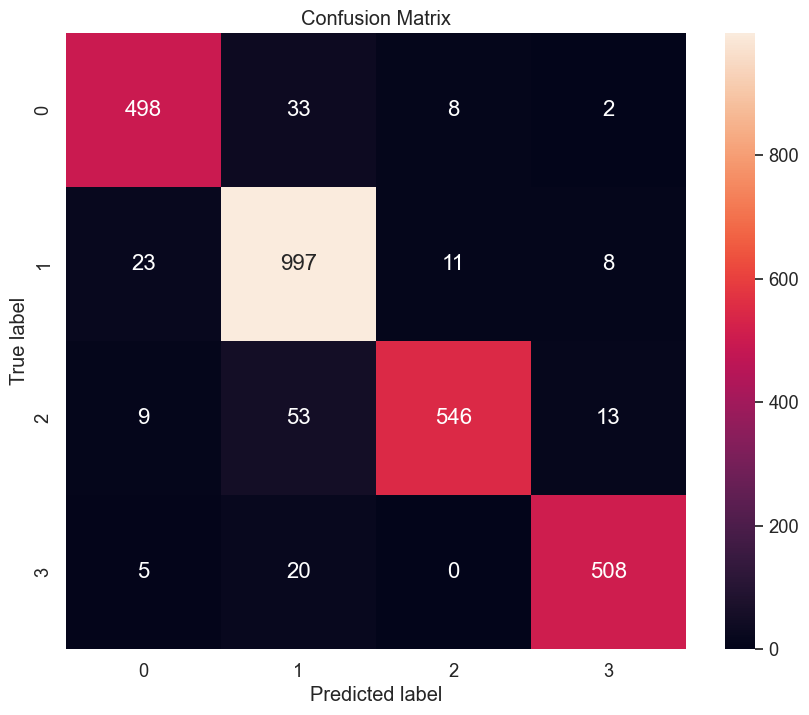

In [54]:
# Prediction and evaluation on test set
naive_bayes_model.fit(X_train_tfidf_selected, y_train)
y_test_pred = naive_bayes_model.predict(X_test_tfidf_selected)
score_test = accuracy_score(y_test, y_test_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())
print(" ")
conf_mat(y_test, y_test_pred, figsize = (10, 8), font_scale = 1.2, annot_kws_size = 16) # Confusion matrix
print(" ")